In [1]:
from geopy.geocoders import Nominatim

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap

In [2]:
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")
 
# entering the location name
getLoc = loc.geocode("Inglewood, CA")
 
# printing address
print(getLoc.address)
 
# printing latitude and longitude
print("Latitude = ", getLoc.latitude)
print("Longitude = ", getLoc.longitude)

Inglewood, Los Angeles County, California, United States
Latitude =  33.9562003
Longitude =  -118.353132


In [3]:
def getGeo(city, state):
    getLoc = loc.geocode(f"{city}, {state}")
    return getLoc.latitude, getLoc.longitude

In [4]:
college = 'ucla'

offers = pd.read_csv(f"data/offers/{college}_offers.csv")
offers['lat'], offers['long'] = zip(*offers.apply(lambda row : getGeo(row['city'],row['state']), axis = 1))

In [5]:
commits = pd.read_csv(f"data/commits/{college}_commits.csv")
commits['school'] = college

In [6]:
offers['school'] = college
offers.head()

,name,school,city,state,lat,long
0,Raleek Brown,ucla,Santa Ana,CA,33.749495,-117.873221
1,Jaydn Ott,ucla,Norco,CA,33.932331,-117.550890
2,Tomarion Harden,ucla,Inglewood,CA,33.956200,-118.353132
3,Tetairoa McMillan,ucla,Anaheim,CA,33.834752,-117.911732
4,C.J. Williams,ucla,Santa Ana,CA,33.749495,-117.873221


In [7]:
offers['state'].unique()

array(['CA', 'WA', 'OR', 'AZ', 'TN', 'ID', 'UT', 'NV', 'IN', 'HI', 'AL',
       'TX'], dtype=object)

In [8]:
G_offer = nx.from_pandas_edgelist(offers, source = 'school', target = 'name', create_using = nx.DiGraph())
G_commit = nx.from_pandas_edgelist(commits, source = 'name', target = 'school', create_using = nx.DiGraph())

In [9]:
G = nx.compose(G_offer, G_commit)

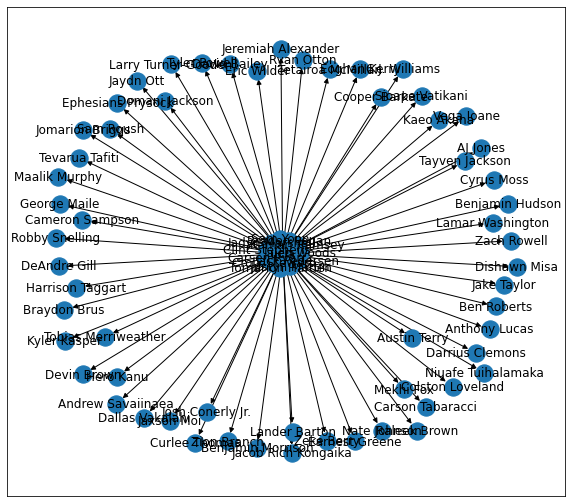

In [10]:
plt.figure(figsize = (10,9))
nx.draw_networkx(G)
# plt.savefig("./images/map_0.png", format = "png", dpi = 300)
plt.show()

In [11]:
plt.figure(figsize = (10,9))
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

<Figure size 720x648 with 0 Axes>

In [12]:
mx, my = m(offers['long'], offers['lat'])

In [13]:
pos = {}
for count, elem in enumerate (offers['name']):
    pos[elem] = (mx[count], my[count])

In [14]:
lat, long = getGeo('Westwood', 'CA')
pos['ucla'] = m(long, lat)

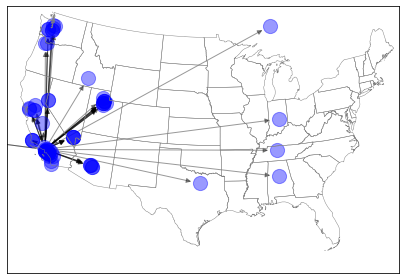

In [15]:
nx.draw_networkx_nodes(G, pos = pos, nodelist = G.nodes(), 
                        node_color = 'b', alpha = 0.4, node_size = 200)
nx.draw_networkx_edges(G, pos = pos, edge_color='black',
                        alpha=0.4, arrows = True)
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')

plt.tight_layout()
# plt.savefig("./images/map_1.png", format = "png", dpi = 300)
plt.show()